In [ ]:
conda install

In [ ]:
pip install conda

In [ ]:
pip install -r requerimientos.txt

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.
Epoch 1/24
52/52 [==============================] - 258s 5s/step - loss: 5.4740 - accuracy: 0.4783 - val_loss: 1.1271 - val_accuracy: 0.6247
Epoch 2/24
52/52 [==============================] - 259s 5s/step - loss: 1.2082 - accuracy: 0.6038 - val_loss: 1.2170 - val_accuracy: 0.6185
Epoch 3/24
52/52 [==============================] - 198s 4s/step - loss: 1.0429 - accuracy: 0.6509 - val_loss: 0.9863 - val_accuracy: 0.7086
Epoch 4/24
52/52 [==============================] - 197s 4s/step - loss: 0.9242 - accuracy: 0.6816 - val_loss: 0.7697 - val_accuracy: 0.7605
Epoch 5/24
52/52 [==============================] - 206s 4s/step - loss: 0.8416 - accuracy: 0.7024 - val_loss: 0.6484 - val_accuracy: 0.7728
Epoch 6/24
52/52 [==============================] - 210s 4s/step - loss: 0.8070 - accuracy: 0.6926 - val_loss: 0.7225 - val_accuracy: 0.7123
Epoch 7/24
52/52 [==============================] - 209s 4s/step - loss

C:\Users\techla\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 384, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 192, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 192, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 96, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 331776)            0         
                                                                 
 dense (Dense)               (None, 256)               8

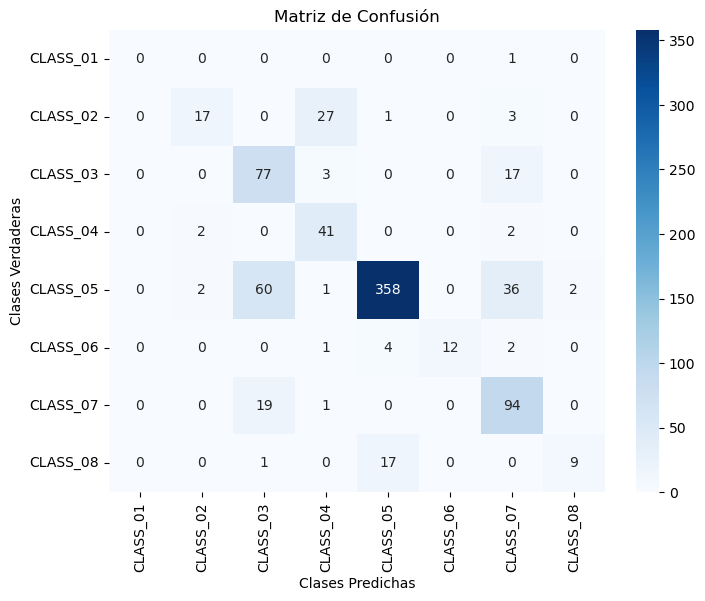

C:\Users\techla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Informe de Clasificación:
               precision    recall  f1-score   support

    CLASS_01       0.00      0.00      0.00         1
    CLASS_02       0.81      0.35      0.49        48
    CLASS_03       0.49      0.79      0.61        97
    CLASS_04       0.55      0.91      0.69        45
    CLASS_05       0.94      0.78      0.85       459
    CLASS_06       1.00      0.63      0.77        19
    CLASS_07       0.61      0.82      0.70       114
    CLASS_08       0.82      0.33      0.47        27

    accuracy                           0.75       810
   macro avg       0.65      0.58      0.57       810
weighted avg       0.81      0.75      0.76       810

1/1 [==============================] - 0s 193ms/step
Predicción: Clase 5


In [1]:
from __future__ import unicode_literals
import sys
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Cierra keras antes de iniciar
K.clear_session()
#Direcciones de las imagenes para entrenamiento
data_entrenamiento = 'C:/Users/techla/Downloads/PRUEBA_FINAL/CarneDataset/train'
data_validacion = 'C:/Users/techla/Downloads/PRUEBA_FINAL/CarneDataset/test'
"""
Parametros para la CNN
"""
epocas=24 #Numero de iteraciones
longitud, altura = 216, 384 #Tamaño de procesamiento de imagenes
batch_size = 32 #Numero de imagenes por cada numero de pasos
pasos = 52 #Numero de veces que se procesa la informacion
validation_steps = 30 #Al final de cada epoca corre validacion
filtrosConv1 = 32 #Filtro de convolucion 1
filtrosConv2 = 64 #Filtro de convolucion 2
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2) #Tamaño de filtro de maxpooling
clases = 8 #Se declaran 8 clases
lr = 0.0005 # Learning rate, tamaño de ajustes para solucion optima
##Preparamos nuestras imagenes para procesarlas
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255, #Reescalado de imagenes
    shear_range=0.3, #
    zoom_range=0.3,  #Zoom a imagenes
    horizontal_flip=True) #Toma una imagen y la invierte 

test_datagen = ImageDataGenerator(rescale=1. / 255) #Imagenes solo reescaladas para validacion

entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento, #Direccion de las imagenes
    target_size=(altura, longitud), 
    batch_size=batch_size,
    class_mode='categorical') #Modo de clasificacion categorica

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

cnn = Sequential() #Red neuronal sequencial
#Primera capa de convolucion
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
#Capa de Maxpooling
cnn.add(MaxPooling2D(pool_size=tamano_pool))
#Siguiente capa convolucional
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
#Capa de Maxpooling
cnn.add(MaxPooling2D(pool_size=tamano_pool))
#Hacer la imagen plana para la red neuronal
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
#Activar 50 por ciento de neuronas aleatorias para crear caminos de solucion diferentes 
cnn.add(Dropout(0.5))
#Agregar capa densa con activacion softmax
cnn.add(Dense(clases, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=lr),
            metrics=['accuracy'])
cnn.fit(
    entrenamiento_generador,
    #steps_per_epoch=pasos,
    epochs=epocas,
     #validation_steps=validation_steps,
    validation_data=validacion_generador)

target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')

# Carga el modelo desde el archivo 'modelo.h5'
loaded_model = load_model('./modelo/modelo.h5')

# Muestra un resumen de la arquitectura del modelo
loaded_model.summary()

# Cargar el modelo desde el archivo 'modelo.h5'
modelo = load_model('./modelo/modelo.h5')

# Crear un generador de datos de prueba sin aumentación de datos
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical',  # Modo de clasificación categórica
    shuffle=False  # No se mezclan las muestras para mantener el orden
)

# Realizar predicciones en el conjunto de datos de prueba
predicciones = modelo.predict(test_generador)

# Obtener las etiquetas verdaderas
etiquetas_verdaderas = test_generador.classes

# Obtener las clases predichas
clases_predichas = np.argmax(predicciones, axis=1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, clases_predichas)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=test_generador.class_indices.keys(), yticklabels=test_generador.class_indices.keys())
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(etiquetas_verdaderas, clases_predichas, target_names=test_generador.class_indices.keys())
print("Informe de Clasificación:\n", informe_clasificacion)

# Cargar el modelo y sus pesos
modelo = 'C:/Users/techla/Downloads/PRUEBA_FINAL/modelo/modelo.h5'
pesos_modelo = 'C:/Users/techla/Downloads/PRUEBA_FINAL/modelo/pesos.h5'
cnn = tf.keras.models.load_model(modelo)
cnn.load_weights(pesos_modelo)

# Ruta del directorio de datos de prueba data_prueba = 'C:/Users/techla/Downloads/PRUEBA_FINAL/CarneDataset/test/CLASS_02/05-CAPTURE_20220421_053715_321.png'

# Definir una función para realizar predicciones
def predict_class(image_path):
    # Cargar y procesar la imagen
    try:
        img = load_img(image_path, target_size=(longitud, altura))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Realizar la predicción
        predictions = cnn.predict(img_array)
        predicted_class = np.argmax(predictions)

        # Definir nombres de clases
        class_names = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7", "Clase 8"]

        # Mostrar la predicción
        if 0 <= predicted_class < len(class_names):
            print(f"Predicción: {class_names[predicted_class]}")
        else:
            print("Predicción: Clase Desconocida")
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")

# Ruta de la imagen de prueba
image_path = 'C:/Users/techla/Downloads/PRUEBA_FINAL/CarneDataset/test/CLASS_06/23-CAPTURE_20220420_234035_224.png'

# Realizar la predicción
predict_class(image_path)